<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Practical-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
def load_csv(filepath):
    return pd.read_csv(filepath)
import pandas as pd
df = pd.read_csv('Housing Dataset.csv')
df.head()

Saving Housing Dataset.csv to Housing Dataset.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
# Selecting only the relevant features (area, bedrooms) for the model
X = df[['area', 'bedrooms']]  # Features: Square footage, number of rooms
y = df['price']  # Target variable: Price of the house

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but it can help with convergence in linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Output the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1381158.8954117913
Mean Squared Error (MSE): 3280176595474.013
Root Mean Squared Error (RMSE): 1811125.7812405005


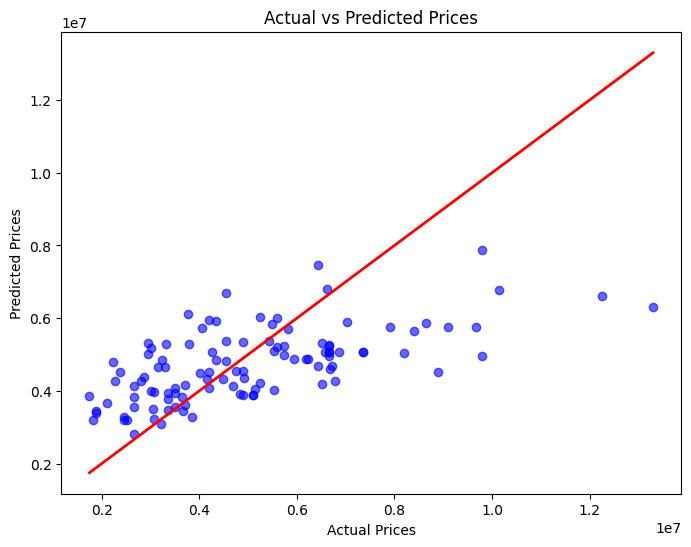

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()